# Phi3-Vision

https://azure.microsoft.com/en-us/blog/new-models-added-to-the-phi-3-family-available-on-microsoft-azure/

In [1]:
import base64
import json
import os
import requests
import ssl
import urllib.request

from dotenv import load_dotenv
from io import BytesIO
from mimetypes import guess_type
from PIL import Image

In [2]:
load_dotenv("azure.env")

# Loading the url and the api key of your Phi3 vision deployed model from the Azure ML Model Catalog
url = os.getenv("url")
api_key = os.getenv("api_key")

In [3]:
def phi3_text(prompt):
    """
    Calling the PHI3 Vision model deployed in Azure ML
    """
    data = {
      "input_data": {
        "input_string": [
          {
            "role": "user",
            "content": [
              {
                "type": "text",
                "text": prompt,
              }
            ]
          }
        ],
        "parameters": { "temperature": 0.8, "max_new_tokens": 2048 }
      }
    }

    body = str.encode(json.dumps(data))
    headers = {
        'Content-Type':'application/json',
        'Authorization':('Bearer '+ api_key),
        'azureml-model-deployment': 'phi-3-vision-128k-instruct-1'
    }
    req = urllib.request.Request(url, body, headers)

    try:
        response = urllib.request.urlopen(req)
        result = json.loads(response.read().decode('utf-8'))['output']
        return result

    except urllib.error.HTTPError as error:
        print("The request failed with status code: " + str(error.code))
        print(error.info())
        print(error.read().decode("utf8", 'ignore'))


In [4]:
result = phi3_text("Who are you?")
print(result)

 I am Phi, an AI developed by Microsoft to assist with providing information, answering questions, and helping users find solutions to their queries.


In [5]:
result = phi3_text("What is the capital of France?")
print(result)

 The capital of France is Paris.


In [6]:
def phi3_vision_url(image_url, prompt):
    """
    Calling the PHI3 Vision model deployed in Azure ML
    """
    data = {
      "input_data": {
        "input_string": [
          {
            "role": "user",
            "content": [
              {
                "type": "image_url",
                "image_url": {
                  "url": image_url
                }
              },
              {
                "type": "text",
                "text": prompt,
              }
            ]
          }
        ],
        "parameters": { "temperature": 0.8, "max_new_tokens": 2048 }
      }
    }

    body = str.encode(json.dumps(data))
    headers = {
        'Content-Type':'application/json',
        'Authorization':('Bearer '+ api_key),
        'azureml-model-deployment': 'phi-3-vision-128k-instruct-1'
    }
    req = urllib.request.Request(url, body, headers)

    try:
        response = urllib.request.urlopen(req)
        result = json.loads(response.read().decode('utf-8'))['output']
        return result

    except urllib.error.HTTPError as error:
        print("The request failed with status code: " + str(error.code))
        print(error.info())
        print(error.read().decode("utf8", 'ignore'))


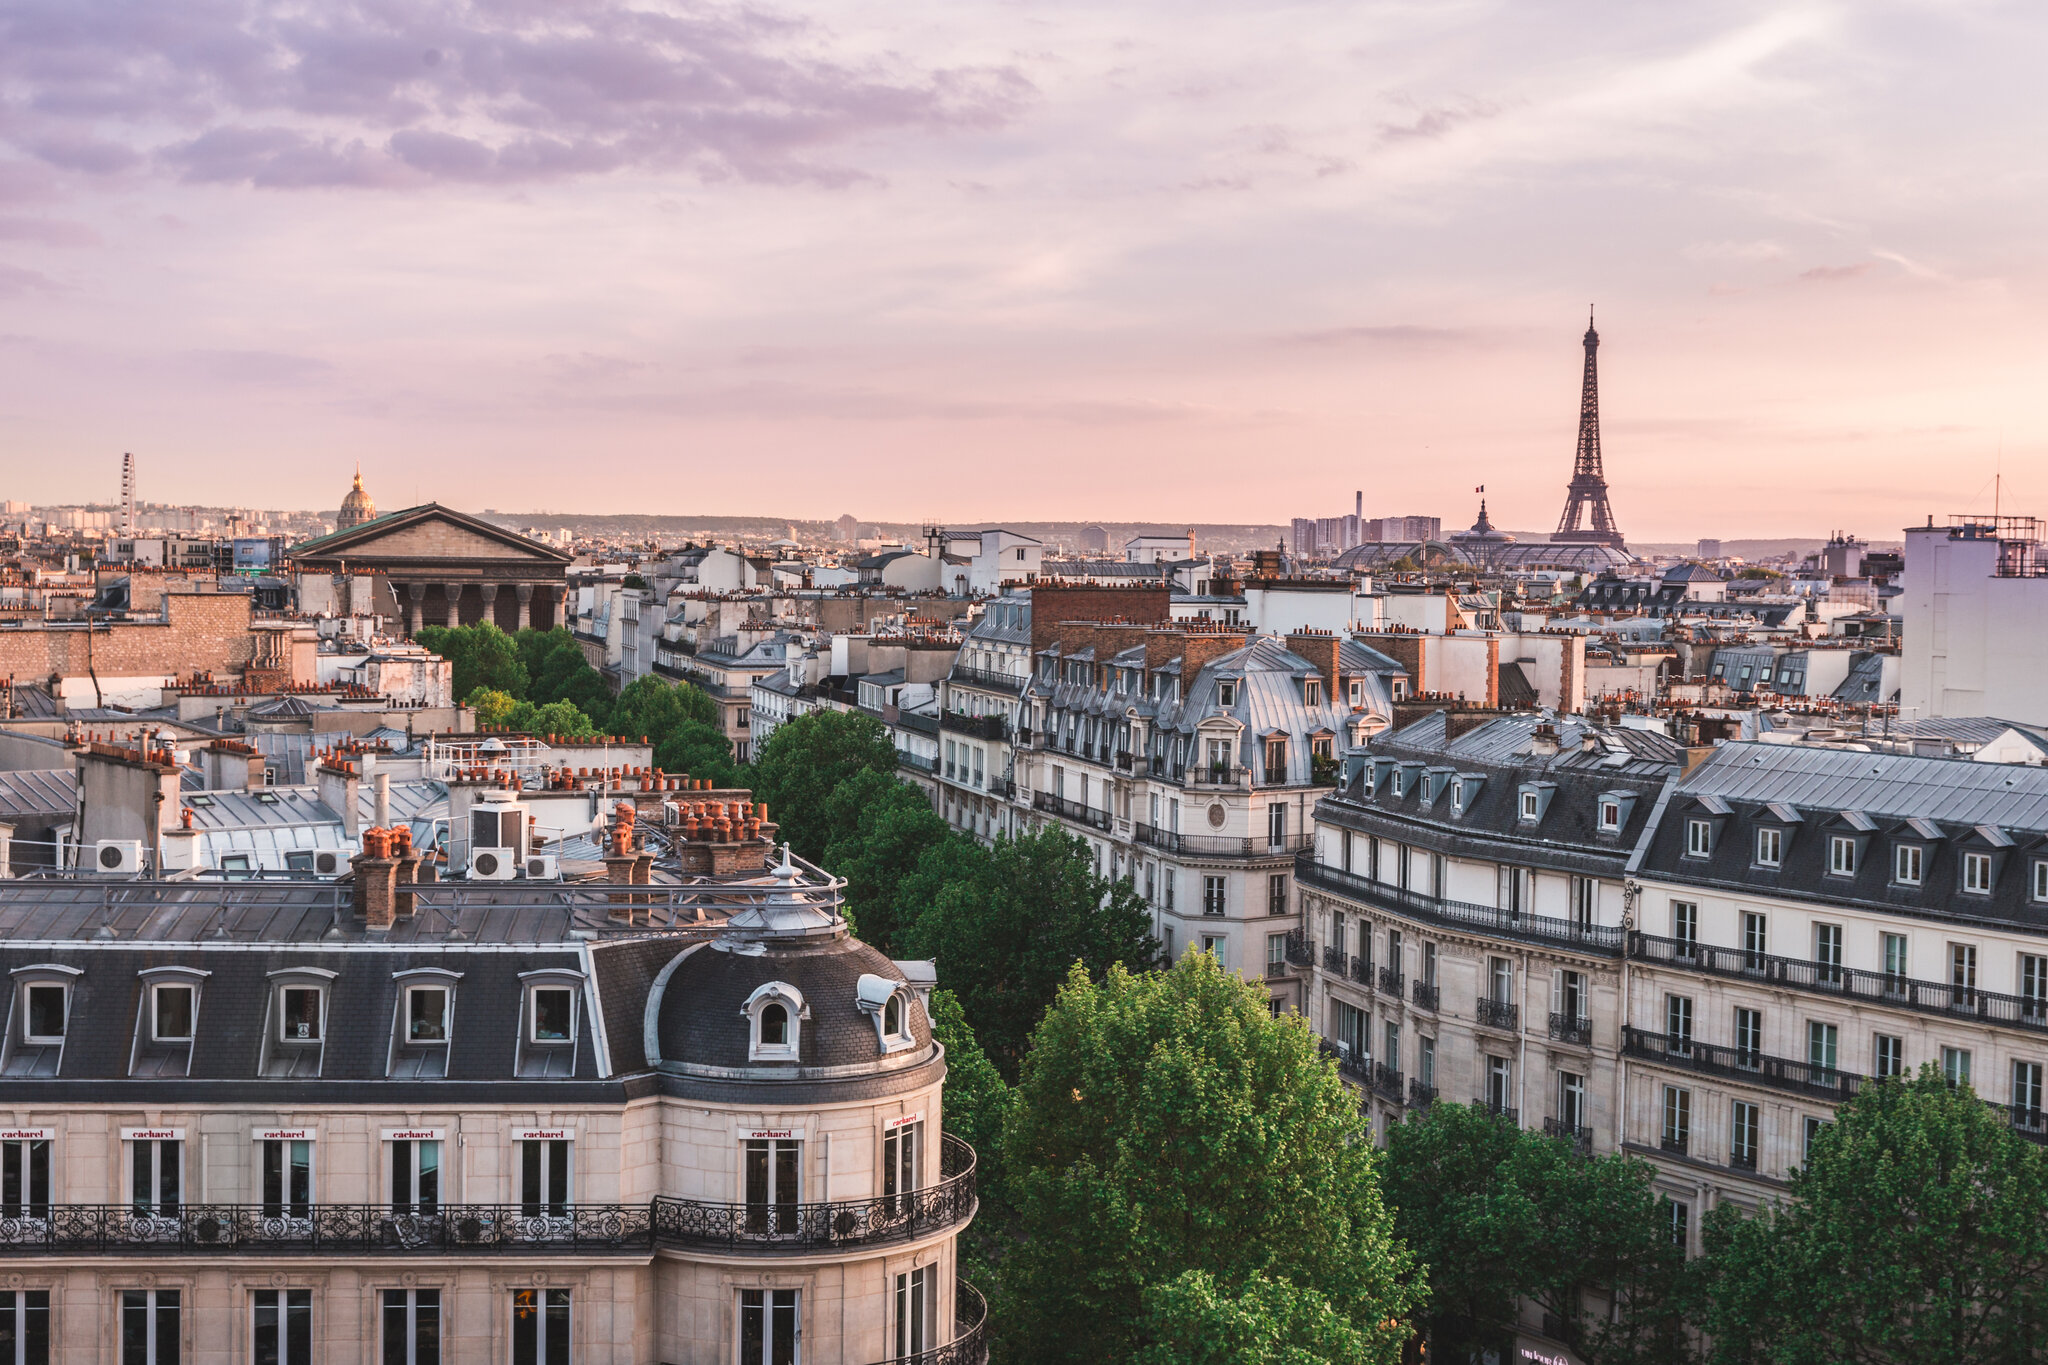

In [7]:
image_url = "https://static01.nyt.com/images/2023/07/01/travel/22hours-paris-tjzf/22hours-paris-tjzf-superJumbo.jpg"

image = Image.open(BytesIO(requests.get(image_url).content))
image

In [8]:
result = phi3_vision_url(image_url, "What is shown in this image? Be extremely detailed and specific.")
print(result)

 The image captures the iconic Eiffel Tower standing tall against the backdrop of a cityscape during sunset. The skyline is a densely packed array of buildings of various sizes and architectural styles. Trees can be seen interspersed among the buildings, adding a touch of greenery to the urban landscape. The perspective of the photo is from a high vantage point, offering a panoramic view of the city that extends to the horizon. The colors in the image are warm, suggesting it was taken during sunset as indicated by the title "sa_18378". The identifier "sa_18378" could be a reference to the specific image file or collection it belongs to. The image does not contain any discernible text. The relative positions of the objects in the image indicate a well-planned urban layout with the Eiffel Tower as the central point of interest.


In [9]:
result = phi3_vision_url(image_url, "Classify this image into Paris, London, Roma. Just print the result")
print(result)

 The image depicts the Eiffel Tower, which is a famous landmark in Paris, France. Therefore, the classification for this image is Paris.


In [20]:
result = phi3_vision_url(image_url, "Caption this image using a list of tags and emojis")
print(result)

 "Paris skyline at sunset with the Eiffel Tower, a blend of historic and modern architecture, surrounded by lush greenery. 🌅🏰🌳🌉🔥"


In [11]:
def local_image_to_data_url(image_path):
    """
    Get the url of a local image
    """
    mime_type, _ = guess_type(image_path)
    
    if mime_type is None:
        mime_type = 'application/octet-stream'
    
    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(image_file.read()).decode('utf-8')
    
    return f"data:{mime_type};base64,{base64_encoded_data}"

In [12]:
def phi3_vision_imagefile(image_file, prompt):
    """
    Calling the PHI3 Vision model deployed in Azure ML
    """
    data = {
      "input_data": {
        "input_string": [
          {
            "role": "user",
            "content": [
              {
                "type": "image_url",
                "image_url": {
                  "url": local_image_to_data_url(image_file)
                }
              },
              {
                "type": "text",
                "text": prompt,
              }
            ]
          }
        ],
        "parameters": { "temperature": 0.5, "max_new_tokens": 2048 }
      }
    }

    body = str.encode(json.dumps(data))
    headers = {
        'Content-Type':'application/json',
        'Authorization':('Bearer '+ api_key),
        'azureml-model-deployment': 'phi-3-vision-128k-instruct-1'
    }
    req = urllib.request.Request(url, body, headers)

    try:
        response = urllib.request.urlopen(req)
        result = json.loads(response.read().decode('utf-8'))['output']
        return result

    except urllib.error.HTTPError as error:
        print("The request failed with status code: " + str(error.code))
        print(error.info())
        print(error.read().decode("utf8", 'ignore'))


In [13]:
def image_view(image_file):
    """
    View image
    """
    if not os.path.exists(image_file):
        print(f"[Error] Image file {image_file} does not exist.")
        return None

    else:
        print(image_file)
        img = Image.open(image_file)
        display(img)

image1.jpg


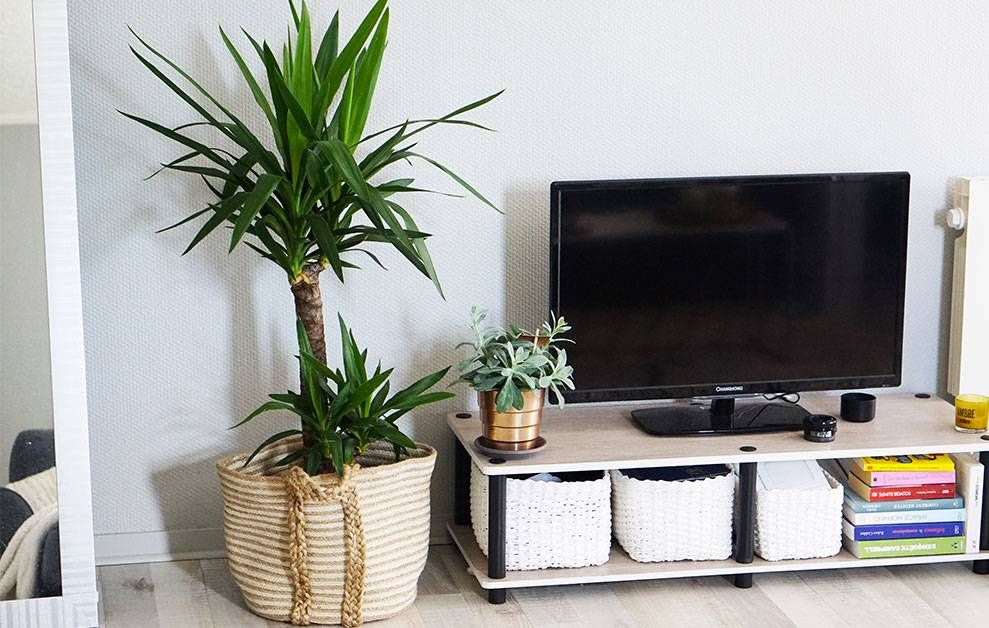

In [14]:
image_file = "image1.jpg"

image_view(image_file)

In [15]:
phi3_vision_imagefile(image_file, "Describe this")

' The image shows a living room setup with a flat-screen TV on a wooden stand. To the left of the TV, there is a tall, slender plant in a woven pot. On the right side of the TV, there are three white baskets, each containing various items. There are also several books stacked on the stand. A black remote is placed on the stand, and a small potted plant is placed next to the TV. A yellow object, possibly a candle holder, is on the right side of the TV. The room has a clean and organized appearance, with a neutral color palette and a modern design.'

image2.jpg


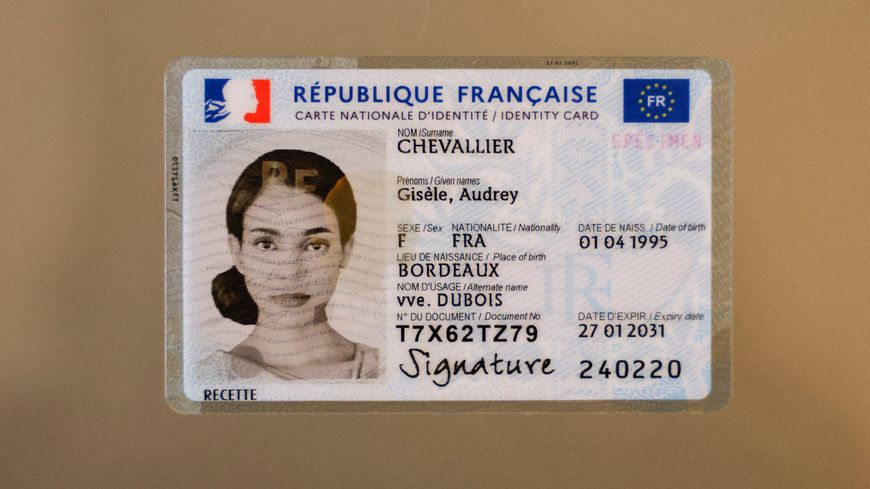

In [16]:
image_file = "image2.jpg"

image_view(image_file)

In [17]:
phi3_vision_imagefile(image_file, "Describe this")

" The image shows a French national identity card. It has a white background with a blue and red flag on the top left corner, indicating it's from France. The card features a portrait of a woman's face on the left side, with the name 'CHEVALLIER' written below it. The right side of the card contains personal details such as nationality, sex, date of birth, place of birth, and alternate name. The card also has a unique identification number and a signature at the bottom."

In [18]:
phi3_vision_imagefile(image_file, "What is the name, the dob, the place of birth and the expiration date?")

' The name is Gisèle Audrey Chevallier, the date of birth is 01 04 1995, the place of birth is Bordeaux, and the expiration date is 27.01.2031.'

In [19]:
phi3_vision_imagefile(image_file, "What is the country of this document?")

" The document is from France, as indicated by the text 'RÉPUBLIQUE FRANÇAISE' at the top of the document."